# Logistic Regression and IRIS DataSet

## About DataSet

It's a default set in sklearn module

There are four features about parametres of flowers

And one parameter – result/target

## Prepearing DataSet

In [2]:
# ============
# Load modules
# ============

from sklearn.datasets import load_iris
import pandas as pd

# ===============
# Ignore warnings
# ===============

import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

# =========
# Load data
# =========

data = load_iris()

X = pd.DataFrame(data.data)
Y = pd.DataFrame(data.target)

In [3]:
# ===========
# First watch
# ===========

print('= X Data — features')
print(X.head(10))

print('\n= Y Data — targets')
print(Y.head(10))

= X Data — features
     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2
5  5.4  3.9  1.7  0.4
6  4.6  3.4  1.4  0.3
7  5.0  3.4  1.5  0.2
8  4.4  2.9  1.4  0.2
9  4.9  3.1  1.5  0.1

= Y Data — targets
   0
0  0
1  0
2  0
3  0
4  0
5  0
6  0
7  0
8  0
9  0


In [4]:
X.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
X.corr()

,0,1,2,3
0,1.000000,-0.117570,0.871754,0.817941
1,-0.117570,1.000000,-0.428440,-0.366126
2,0.871754,-0.428440,1.000000,0.962865
3,0.817941,-0.366126,0.962865,1.000000


## Separating DataSet

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=31)

## Checking nude model

### Training

In [7]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Scores

In [8]:
print('Score Train: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Score Test: {:.2f}'.format(logreg.score(X_test, y_test)))

Score Train: 0.96
Score Test: 0.82


### + Help-functions

In [9]:
# ============================
# Printing big information set
# ============================

def print_results(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    name_model = type(model).__name__
    
    print('= Model: {}\n'.format(name_model))
    
    print('= Params:')
    display(model.get_params())
    
    print('= Train score \t{:.2f}\n'.format(train_score))
    print('= Test score \t{:.2f}\n'.format(test_score))
    
# =============================================================    
# Printing small information set and return scores for plotting
# =============================================================

def simple_results(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    print('= Train score \t{:.2f}'.format(train_score))
    print('= Test score \t{:.2f}'.format(test_score))
    
    return train_score, test_score

### Checking probability of score

In [10]:
lore_probas = pd.DataFrame(logreg.predict_proba(X_test)[:10])
lore_pred_10   = pd.DataFrame(logreg.predict(X_test)[:10])
lore_real_10   = pd.DataFrame(y_test[:10]).reset_index(drop=True)

lore_probas.columns = ['percent_proba_0', 'percent_proba_1', 'percent_proba_2']
lore_probas['predict_10'] = lore_pred_10
lore_probas['real_10'] = lore_real_10

display(lore_probas.style.background_gradient(cmap='summer'))

,percent_proba_0,percent_proba_1,percent_proba_2,predict_10,real_10
0,0.0175381,0.322417,0.660045,2,1
1,0.000531198,0.25085,0.748618,2,2
2,0.863358,0.136507,0.000135277,0,0
3,0.0473455,0.555576,0.397079,1,1
4,0.00123199,0.274499,0.724269,2,2
5,0.823766,0.176088,0.000146194,0,0
6,0.00339216,0.369179,0.627428,2,2
7,0.0664475,0.595785,0.337768,1,1
8,0.965356,0.0346329,1.09273e-05,0,0
9,0.925554,0.074379,6.69979e-05,0,0


## Check scores change with C-parameter change


== == == == == == == ==

C: 	0.001
= Train score 	0.38
= Test score 	0.37

== == == == == == == ==

C: 	0.01
= Train score 	0.70
= Test score 	0.58

== == == == == == == ==

C: 	0.1
= Train score 	0.77
= Test score 	0.63

== == == == == == == ==

C: 	1.0
= Train score 	0.96
= Test score 	0.82

== == == == == == == ==

C: 	10.0
= Train score 	0.99
= Test score 	0.92

== == == == == == == ==

C: 	100.0
= Train score 	0.99
= Test score 	0.95


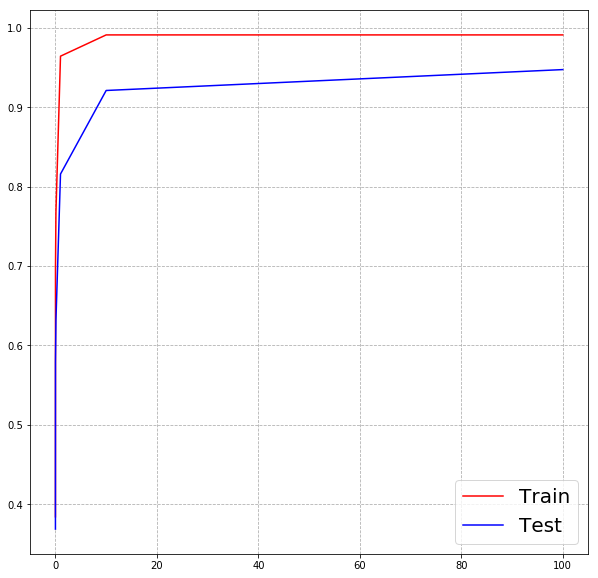

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

C_array = [0.001, 0.01, 0.1, 1., 10., 100.]
C_tr = []
C_te = []

model = LogisticRegression()

for i_c in C_array:
    print('\n== == == == == == == ==\n')
    print('C: \t{}'.format(i_c))
    model = LogisticRegression(C=i_c)
    tr, te = simple_results(model, X_train, X_test, y_train, y_test)
    C_tr.append(tr)
    C_te.append(te)

plt.figure(figsize=(10,10))
plt.plot(C_array, C_tr, 'r', label='Train')
plt.plot(C_array, C_te, 'b', label='Test')
plt.grid(linestyle='--')
plt.legend(prop={'size': 20})

![Homer](simps.gif)